In [13]:
import sys
import pathlib
import os

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Local
cwd = pathlib.Path().resolve()
src = cwd.parent
root = src.parent
sys.path.append(str(src))
sys.path.append(str(root))

Load in all of the error data

In [19]:
# # It is probably easiest to put the file containing the errors in this same directory
# # each error file is an array with at least 2 inputs: 
# # * 1 for the initial condition (which should always be zero)
# # * 1 for the final condition (t=97)

fnames = os.listdir()
errors = {}

for item in fnames:
    if not '.ipynb' in item:
        errors[item] = np.loadtxt(item)

# print(error_files)
        

# errors = {
#     "MLP":{
#         # "MLP without data augmentation": ...,
#         # "MLP with data augmentation": ...,
#     },
#     "CNN":{
#         "CNN": np.loadtxt("CNN"),
#         "CNN PIL": np.loadtxt("CNN_PIL"),
#         "CNN_PID": np.loadtxt("CNN_PID"),
#         "CNN_PIDPID": np.loadtxt("CNN_PIDPID"),
#         "TempCNN": np.loadtxt("TempCNN"),
#     },
#     "U-Net":{
#         # "U-net1": ... ,
#     }
# }

In [5]:
plt.style.use('seaborn')

In [20]:
# fig, ax = plt.subplots(3, 1, figsize=(15, 9))
# i = -1

# for key in list(errors.keys()):

#     if key=="MLP":

        



#     elif key=="CNN":



#     i+=1
#     data = errors[key]

#     if len(data.shape) == 2:
#         t = data[0,:]
#         data = data[1,:]
    
#     if len(data.shape) == 1:

#         # check if error is only single value (as is the case for MLPs)
#         if len(data) == 1:
#             data = np.array((0, data[0]))

#         t = np.arange(0, len(data))

#     ax[i].plot(t[1:], data[1:], label=key, marker='X', markersize=5)

# plt.suptitle("Error accumulation for different models")
# ax.set_xlabel("timestep t")
# ax.set_ylabel("MSE error (targets and outputs)")
# ax.set_yscale('log')
# ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


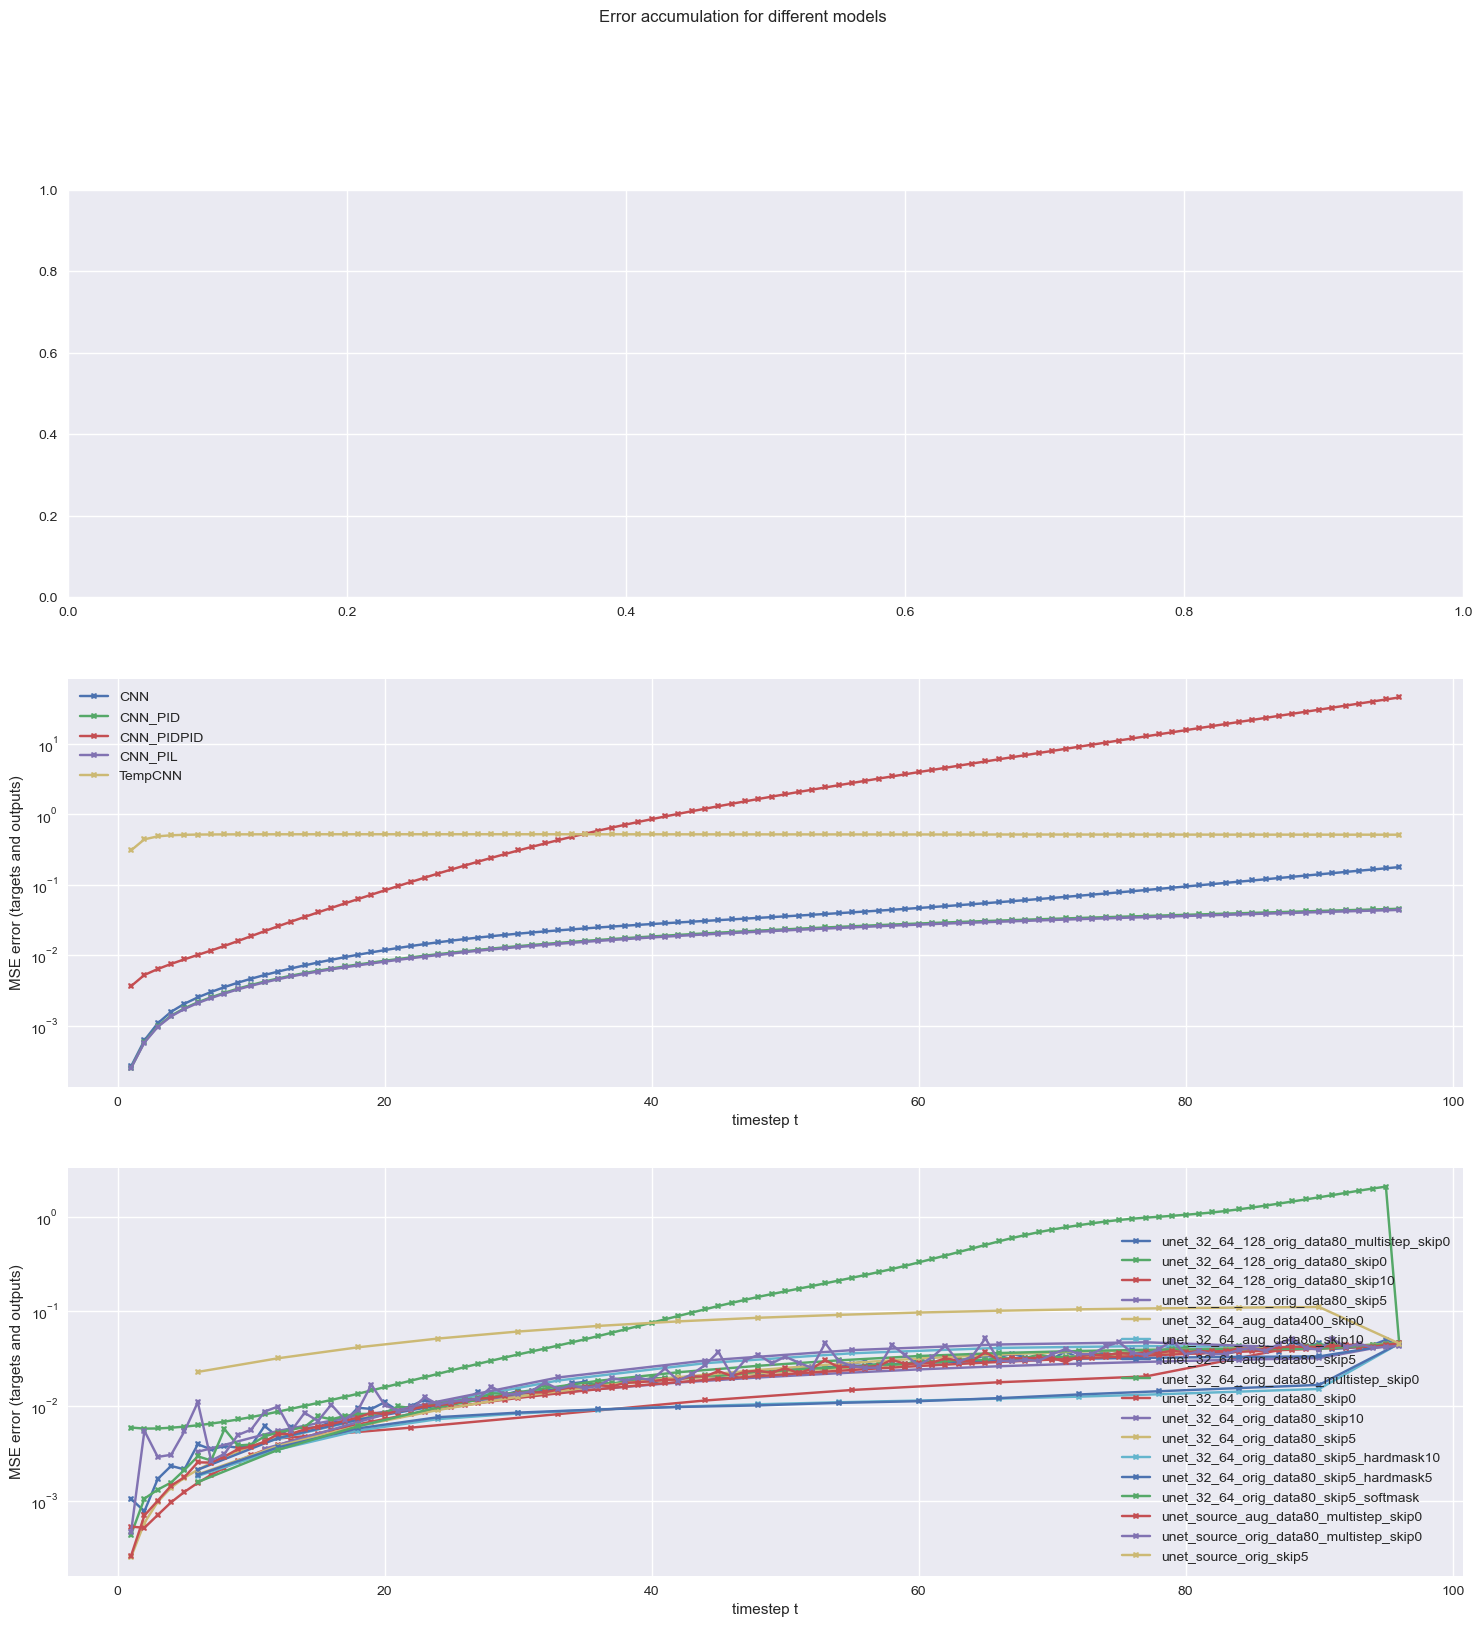

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(18, 18))
plt.suptitle("Error accumulation for different models")

for key in list(errors.keys()):
    data = errors[key]
    print(len(data.shape))
    if len(data.shape) == 1:
        t = np.arange(0, len(data))
    else:
        t = data[0,:]
        data = data[1,:]

    if 'mlp' in key:
        i = 0
    else:
        if 'CNN' in key:
            i = 1
        else:
            i = 2

        ax[i].plot(t[1:], data[1:], label=key, marker='X', markersize=5)

        for i in [1, 2]:
            ax[i].set_xlabel("timestep t")
            ax[i].set_ylabel("MSE error (targets and outputs)")
            ax[i].set_yscale('log')
            ax[i].legend()

In [48]:
# best averaged MSE

e = np.Inf

scale = True

for key in list(errors.keys()):

    # mse is scaled temporally. The further it is away, the higher it's contribution
    data = errors[key]

    if scale:
        if len(data.shape) == 1:
            t = np.arange(0, len(data))
        else:
            t = data[0,:]
            data = data[1,:]
    else:
        if len(data.shape) == 1:
            t = np.zeros(data.shape)
        else:
            data = data[1,:]
            t = np.zeros(data.shape)

    if np.sum(data*np.exp(-t)) / len(data) < e:
        e = np.sum(data*np.exp(-t)) / len(data)
        best_model = key

print(best_model)

unet_32_64_orig_data80_skip10
